**Global Warming Data Analysis**

For personal interest, and to practice with and learn Python, I wanted to explore a global warming dataset to look for any patterns in the data and ideally use Data Analysis techniques to try and predict future trends (Time Series Analysis)


**Start by Importing necessary libraries**. 

In [35]:
# load necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plots and analysis
import seaborn as sns # chart tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA # time series analysis
from math import sqrt


**Load the Data.** Import source data from Kaggle library

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures

LandAverageTemperature: global average land temperature in celsius

LandAverageTemperatureUncertainty: the 95% confidence interval around the average

LandMaxTemperature: global average maximum land temperature in celsius

LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature

LandMinTemperature: global average minimum land temperature in celsius

LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature

LandAndOceanAverageTemperature: global average land and ocean temperature in celsius

LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global av

In [36]:
#import source data
global_temp = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv" )

**Exploratory Data Analysis (EDA).**
Check for data quality issues and take corrective action.
Look for patterns, outliers, trends.

In [37]:
# Initial look at the dataset
print(global_temp.head())

           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                 

We see a lot of nulls, but the data description states that there is no data for most columns prior to 1850. So one step to prepare the data might be to remove data prior to this date depending on our needs.

**Data Prep.**

Convert the date to a datetime format for easier use/presentation.

Remove data prior to 1850.

Create an index from the date for use in more advanced visualisations.

In [38]:
# Convert date column to datetime
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

# Remove data from before 1850
global_temp = global_temp[global_temp['dt'].dt.year >= 1850]

# use the existing date column to create an index
global_temp.set_index('dt', inplace=True)

Now inspect the data again

In [39]:
# Second look at the dataset
print(global_temp.head())

            LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1850-01-01                   0.749                              1.105   
1850-02-01                   3.071                              1.275   
1850-03-01                   4.954                              0.955   
1850-04-01                   7.217                              0.665   
1850-05-01                  10.004                              0.617   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1850-01-01               8.242                          1.738   
1850-02-01               9.970                          3.007   
1850-03-01              10.347                          2.401   
1850-04-01              12.934                          1.004   
1850-05-01              15.655                          2.406   

            LandMinTemperature  

Now we can see more meaningful data across our fields

Lets look at some summary information on the data set

In [40]:
# Display a summary view
print(global_temp.info())
print(global_temp.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB
None
       LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             1992.000000            

It appears we have removed all null data, but we can check to be sure

In [41]:
# Check for missing values
print(global_temp.isnull().sum())

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64


**Plot the data.**

It looks like no further data prep is needed for now, so lets use some common plots to look for patterns, trends and outliers

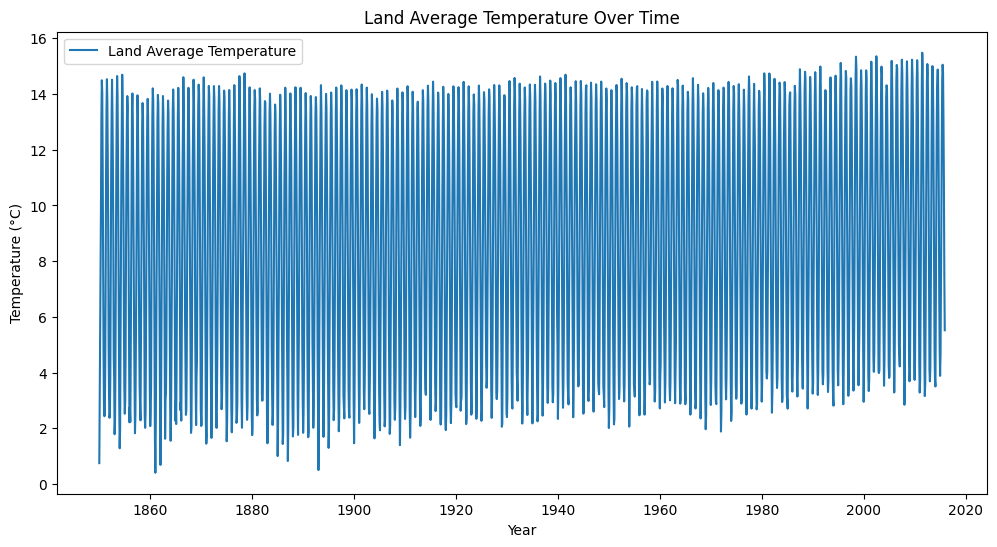

In [42]:
# Land temperature over time
plt.figure(figsize=(12, 6))
plt.plot(global_temp.index, global_temp['LandAverageTemperature'], label='Land Average Temperature')
plt.title('Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

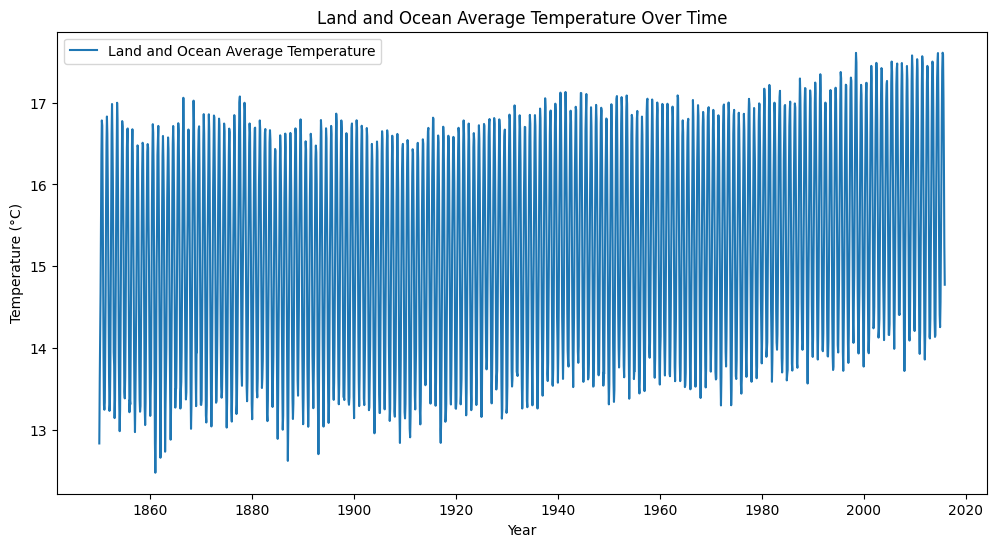

In [43]:
# Land and Ocean temperature over time
plt.figure(figsize=(12, 6))
plt.plot(global_temp.index, global_temp['LandAndOceanAverageTemperature'], label='Land and Ocean Average Temperature')
plt.title('Land and Ocean Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

We can see both charts show an upwards trend, however the trend is more pronounced for the land and ocean temperatures.

We can infer that the average ocean temperature must be rising more quickly than the average land temperature.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


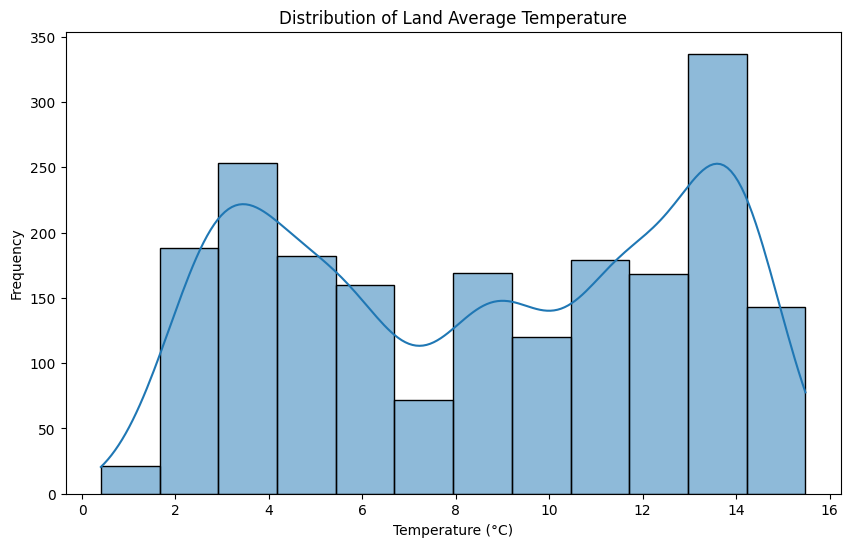

In [44]:
# Distribution of temperatures - land
plt.figure(figsize=(10, 6))
sns.histplot(global_temp['LandAverageTemperature'], kde=True)
plt.title('Distribution of Land Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

This doesn't seem to reveal anything except that the most common average temperature is one of the higher ones.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


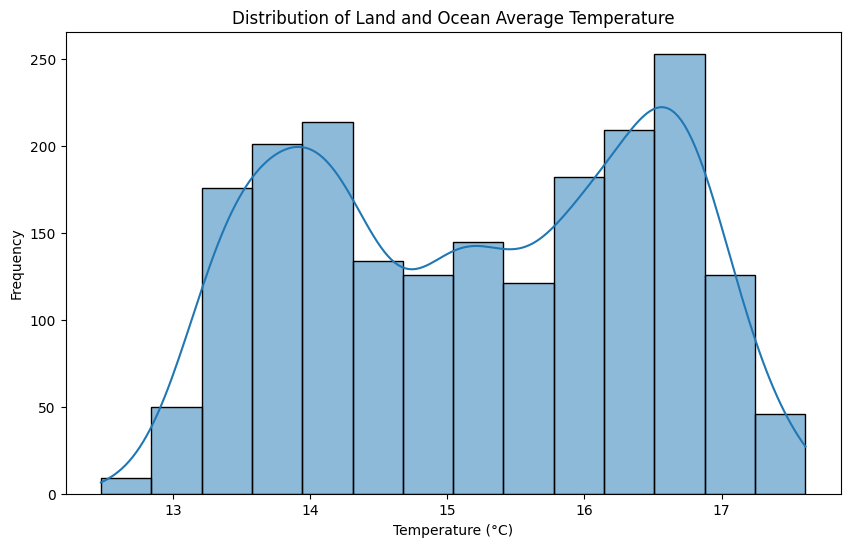

In [45]:
# Distribution of temperatures - land and ocean
plt.figure(figsize=(10, 6))
sns.histplot(global_temp['LandAndOceanAverageTemperature'], kde=True)
plt.title('Distribution of Land and Ocean Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

Including the ocean temperatures gives a smaller range, but also a higher one.

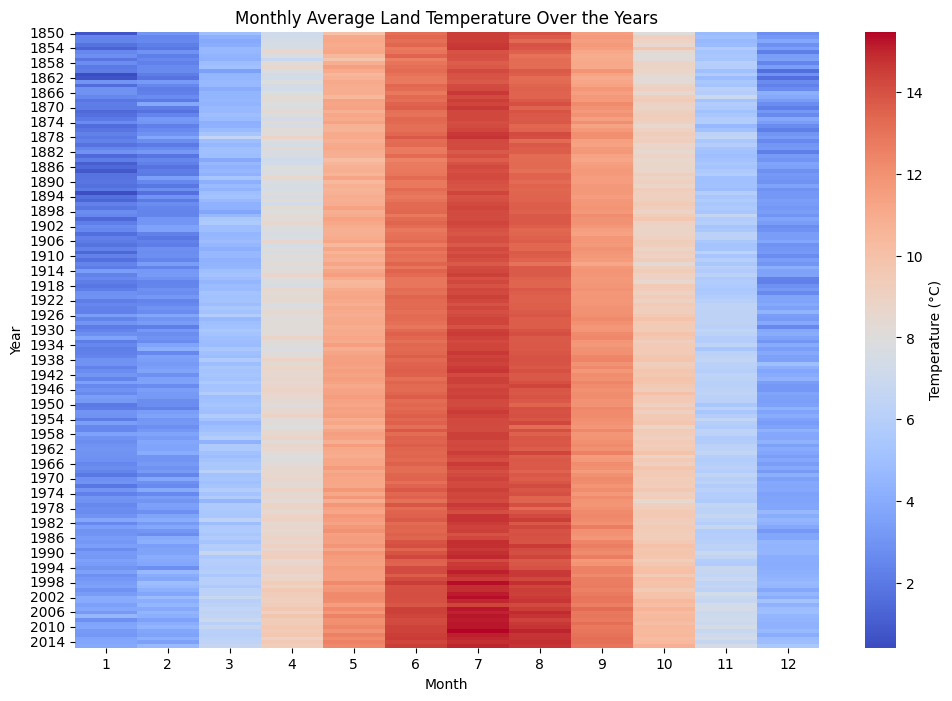

In [46]:
# Monthly average Land temperature over the years
global_temp['Year'] = global_temp.index.year
global_temp['Month'] = global_temp.index.month
monthly_avg_temp = global_temp.groupby(['Year', 'Month'])['LandAverageTemperature'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg_temp, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Monthly Average Land Temperature Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

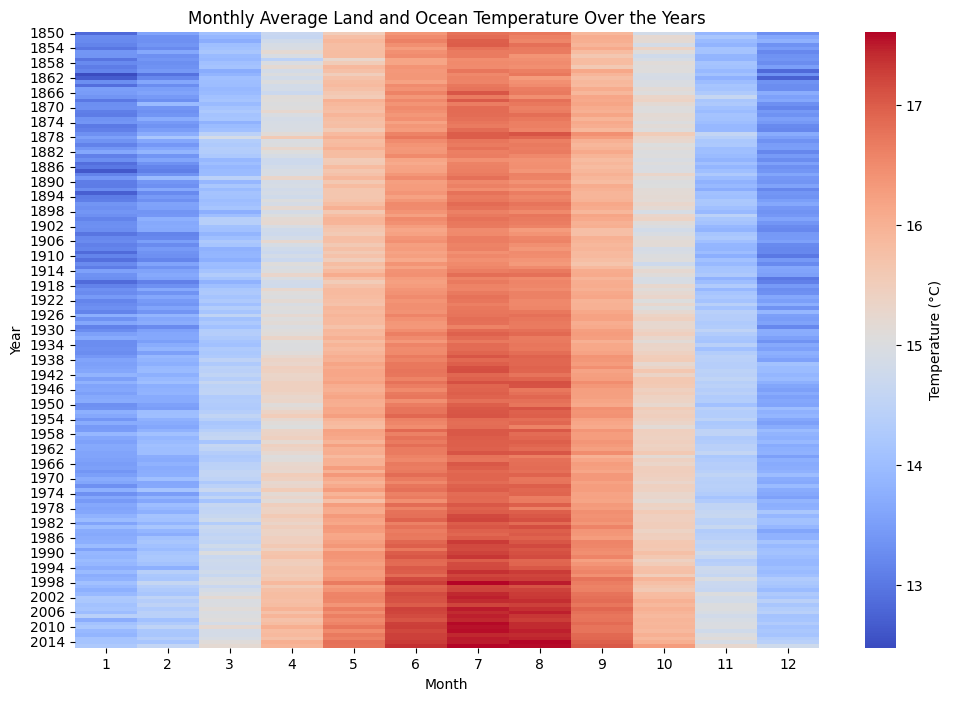

In [47]:
# Monthly average Land and Oceantemperature over the years
global_temp['Year'] = global_temp.index.year
global_temp['Month'] = global_temp.index.month
monthly_avg_temp = global_temp.groupby(['Year', 'Month'])['LandAndOceanAverageTemperature'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg_temp, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Monthly Average Land and Ocean Temperature Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

When including the Ocean temperature, the shift towards warmer averages across the middle 9 months is more pronounced.

**Data Analysis**

Linear Regression models to look at any connection between date and temperature as the basis for a predictor.

Time series analysis (Moving Average) to try and forecast.

In [48]:
# Extract year from the index
global_temp['Year'] = global_temp.index.year
X = global_temp[['Year']]
y = global_temp['LandAverageTemperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')
print(f'Train R2: {train_r2}, Test R2: {test_r2}')

Train MSE: 17.79134706871899, Test MSE: 18.960092732793527
Train R2: 0.018098341686197394, Test R2: -0.033462643879339726


These results indicate the the model is not very reliable. 
The Mean Squared Error (MSE) values are high, meaning predictions are far off of actual valies.
The R squared value is far off of 1 and close to 0 means a horizontal line would give more reliable predicitions across the data set.

But lets plot it to visually demonstrate

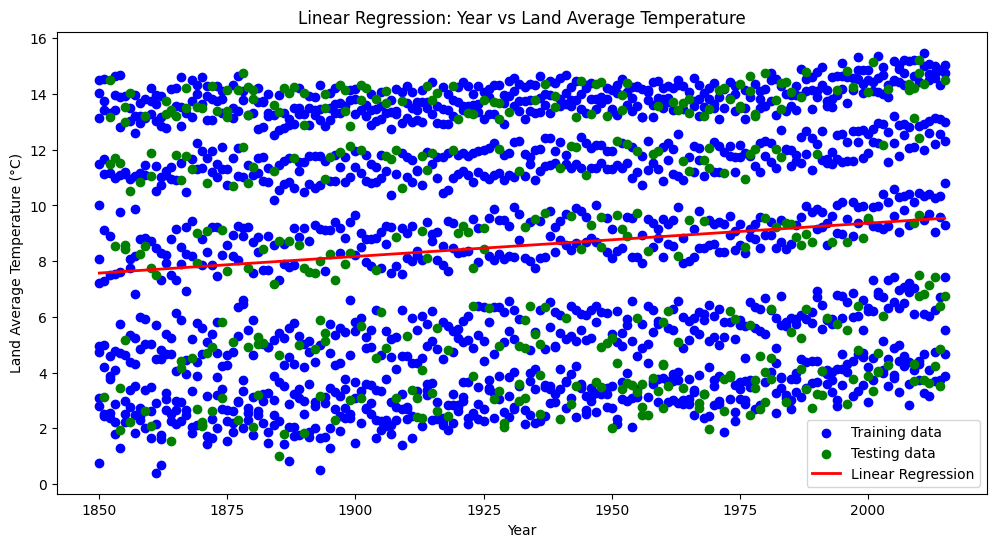

In [49]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Year vs Land Average Temperature')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.legend()
plt.show()

So there would be little value in using this model as a predictor for future temperatures

Lets try using an autoregressive moving average time series analysis model.

Instructions for this model came from statsmodel

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 1992
Model:                     ARIMA(5, 1, 0)   Log Likelihood               -1657.321
Date:                    Thu, 13 Jun 2024   AIC                           3326.642
Time:                            17:41:55   BIC                           3360.221
Sample:                        01-01-1850   HQIC                          3338.974
                             - 12-01-2015                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3133      0.018     17.518      0.000       0.278       0.348
ar.L2          0.3171      0.019     16.418      0.000       0.279       0.355
ar.L3          0.039

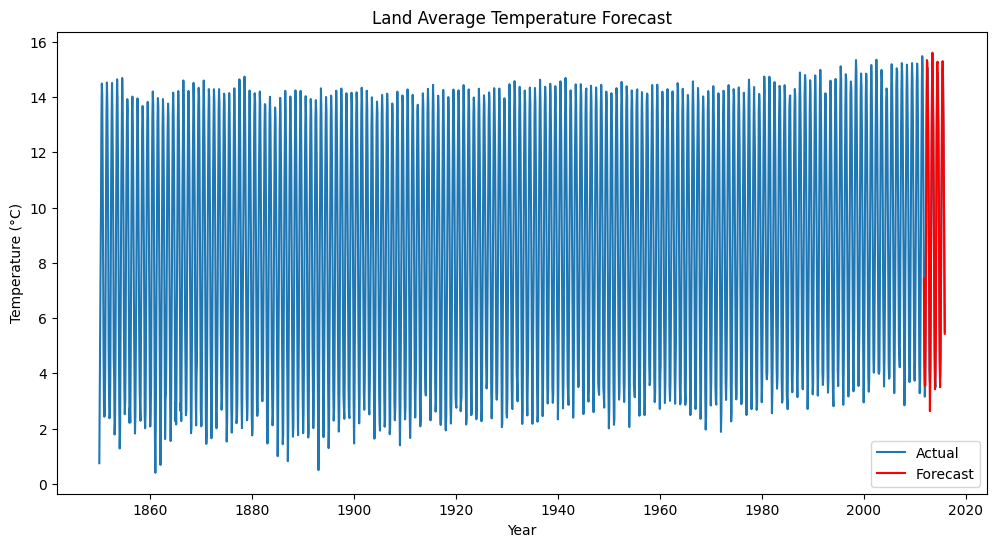

In [50]:
# Define the model
model_L = ARIMA(global_temp['LandAverageTemperature'], order=(5, 1, 0))

# Fit the model
model_fit_L = model_L.fit()

# Summary of the model
print(model_fit_L.summary())

# Make predictions
global_temp['Forecast'] = model_fit_L.predict(start=len(global_temp)-50, end=len(global_temp)-1, dynamic=False)

# Calculate MSE of the forecast
mse = mean_squared_error(global_temp['LandAverageTemperature'][-50:], global_temp['Forecast'][-50:])
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(global_temp.index, global_temp['LandAverageTemperature'], label='Actual')
plt.plot(global_temp.index[-50:], global_temp['Forecast'][-50:], color='red', label='Forecast')
plt.title('Land Average Temperature Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

We can see from the MSE of close to 0 that the predictions fall quite close to actual data points, and this model is fairly reliable.

This is easier to see from the actual plot above.

Now that we have a reliable model, lets project this forward to predict future values

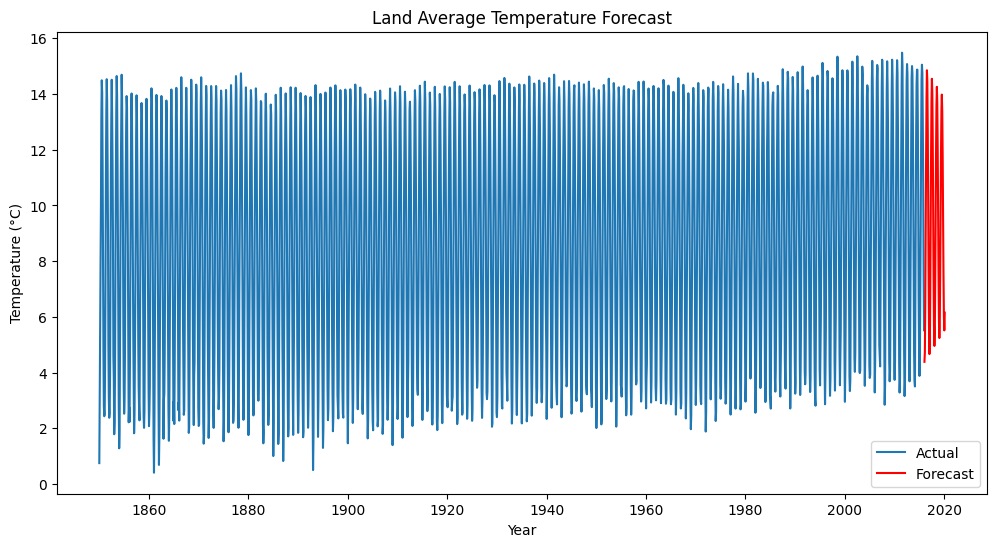

In [51]:
# Make future predictions
n_forecast = 50  # Number of steps to forecast forward
forecast = model_fit_L.forecast(steps=n_forecast)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(global_temp.index, global_temp['LandAverageTemperature'], label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.title('Land Average Temperature Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

These predictions look reasonable, but we can see they become increasingly tight in range.
This is a limitation of the moving average approach, where it becomes increasingly unreliable going forward due to being fed by its own predictions.

Now repeat for the Land and Ocean temperatures

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:     LandAndOceanAverageTemperature   No. Observations:                 1992
Model:                             ARIMA(5, 1, 0)   Log Likelihood                 438.674
Date:                            Thu, 13 Jun 2024   AIC                           -865.348
Time:                                    17:41:57   BIC                           -831.770
Sample:                                01-01-1850   HQIC                          -853.016
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4436      0.020     22.398      0.000       0.405       0.482
ar.L2          0.2603      0.021   

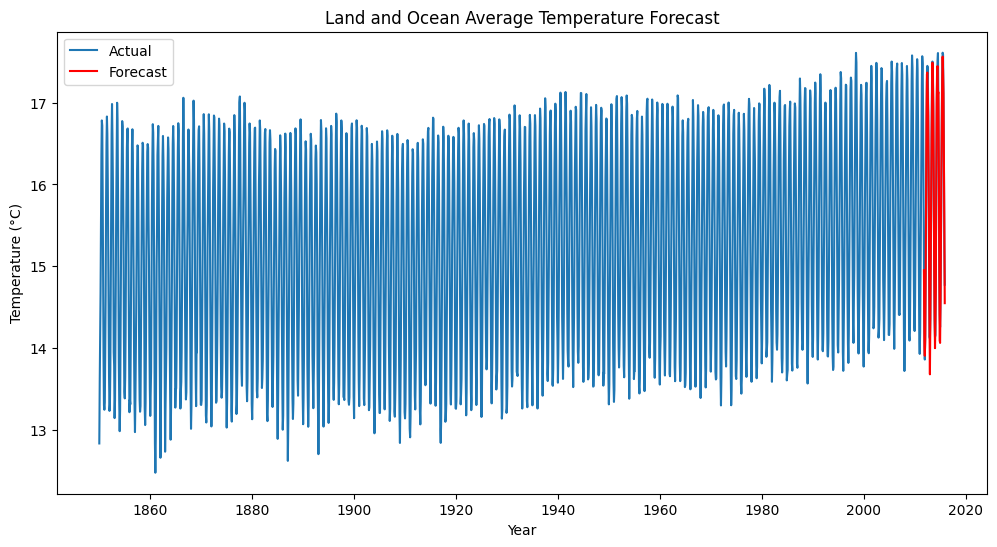

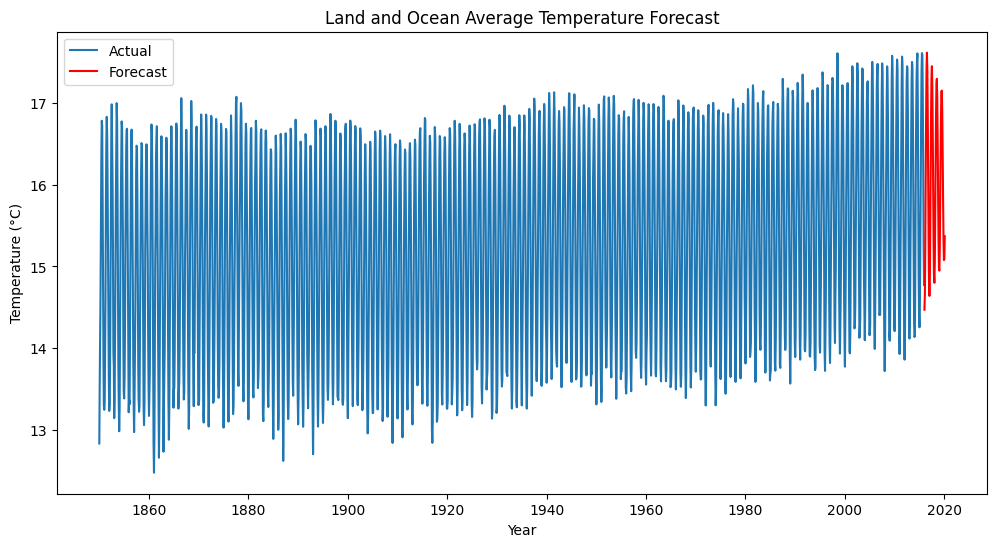

In [52]:
# Define the model
model_LA = ARIMA(global_temp['LandAndOceanAverageTemperature'], order=(5, 1, 0))

# Fit the model
model_fit_LA = model_LA.fit()

# Summary of the model
print(model_fit_LA.summary())

# Make predictions
global_temp['Forecast'] = model_fit_LA.predict(start=len(global_temp)-50, end=len(global_temp)-1, dynamic=False)

# Calculate MSE of the forecast
mse = mean_squared_error(global_temp['LandAndOceanAverageTemperature'][-50:], global_temp['Forecast'][-50:])
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(global_temp.index, global_temp['LandAndOceanAverageTemperature'], label='Actual')
plt.plot(global_temp.index[-50:], global_temp['Forecast'][-50:], color='red', label='Forecast')
plt.title('Land and Ocean Average Temperature Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Make future predictions
n_forecast = 50  # Number of steps to forecast forward
forecast = model_fit_LA.forecast(steps=n_forecast)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(global_temp.index, global_temp['LandAndOceanAverageTemperature'], label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.title('Land and Ocean Average Temperature Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


This model looks similarly accurate, given the limitations as we go further out.

Now, lets use this model to predict future temperatures.

**Reflections and Next Steps**

We explored the data, performed some basic data transformation to make it more robust for our purposes in line with Data Quality standards. EDA was carried out to identify patterns and outliers.

We tried two approaches to build a predictive model. Linear regression was not useful, but Moving Average Time Series analysis did allow us to create reliable predictions.
I would recommend building this into a regular report, updated and refreshed via a governed automated pipeline at least once a month given that moving averages can only be reliably extended so far.

As my source data misses recent years, it would be useful as a validation exercise to compare the models predictions to actual results and in particular to understand how unexpected global events such as Covid lockdowns affected the trend.

We could revisit the usefulness of Linear Regression and other techniques by bringing other data around things such as location, population density and perhaps identify key contributing factors.

